<a href="https://colab.research.google.com/github/saulcova3/Python-Prep/blob/main/EDA_Billionaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nelgiriyewithana_billionaires_statistics_dataset_path = kagglehub.dataset_download('nelgiriyewithana/billionaires-statistics-dataset')

print('Data source import complete.')


100%|██████████| 139k/139k [00:00<00:00, 412kB/s]

Extracting files...
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
billionaires_statistics_dataset_path = kagglehub.dataset_download('nelgiriyewithana/billionaires-statistics-dataset')

# Find the CSV file within the downloaded dataset directory
for filename in os.listdir(billionaires_statistics_dataset_path):
    if filename.endswith('.csv'):
        csv_file_path = os.path.join(billionaires_statistics_dataset_path, filename)
        break  # Stop after finding the first CSV file

# Now read the CSV file
df = pd.read_csv(csv_file_path)

In [20]:
# prompt: Clasificar las variables según su tipo (numérica o categórica).

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['rank', 'finalWorth', 'age', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country']
Categorical features: ['category', 'personName', 'country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'gdp_country', 'continent']


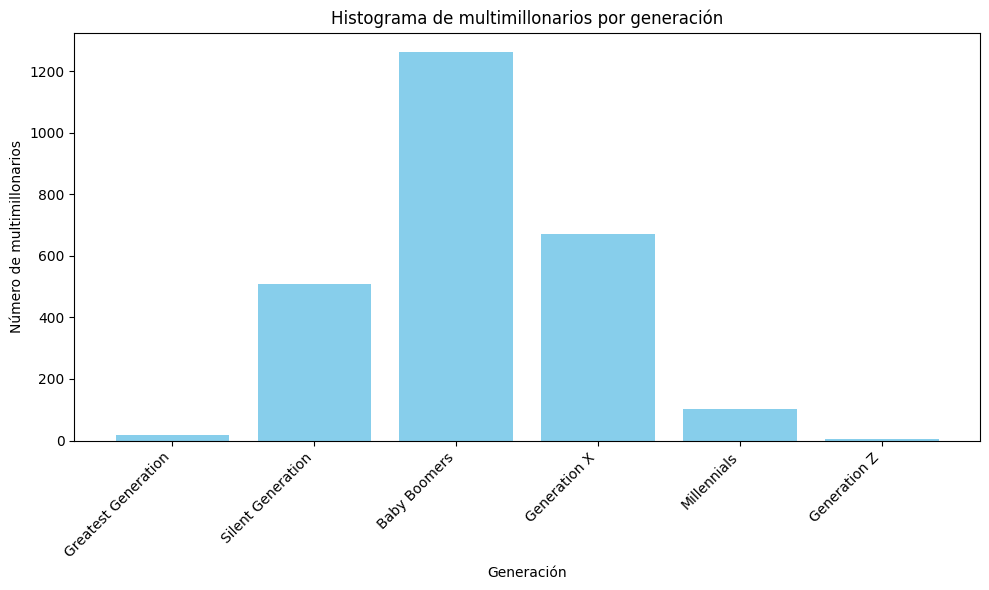

In [22]:
# prompt: Histograma por generaciones (usando como referencia la columna 'birthYear')

import matplotlib.pyplot as plt

# Define generation boundaries (adjust these as needed)
generation_boundaries = {
    'Greatest Generation': (1901, 1927),
    'Silent Generation': (1928, 1945),
    'Baby Boomers': (1946, 1964),
    'Generation X': (1965, 1980),
    'Millennials': (1981, 1996),
    'Generation Z': (1997, 2012),
    # Add more generations as needed
}

generation_counts = {}
for generation, (start_year, end_year) in generation_boundaries.items():
  generation_counts[generation] = len(df[(df['birthYear'] >= start_year) & (df['birthYear'] <= end_year)])

generations = list(generation_counts.keys())
counts = list(generation_counts.values())


plt.figure(figsize=(10, 6))
plt.bar(generations, counts, color='skyblue')
plt.xlabel("Generación")
plt.ylabel("Número de multimillonarios")
plt.title("Histograma de multimillonarios por generación")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

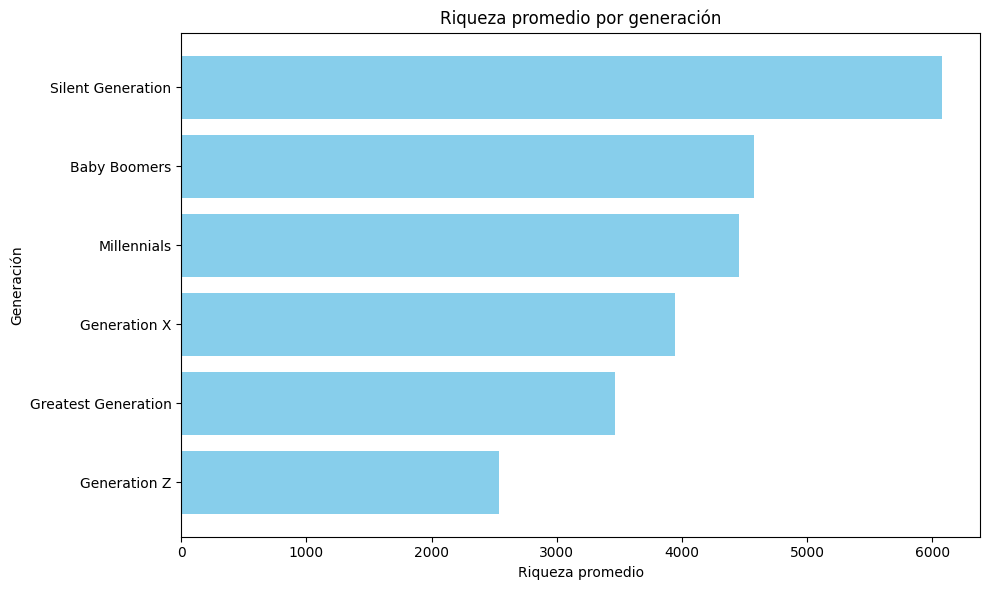

In [24]:
# prompt: Gráfico de barras horizontal que muestre la riqueza promedio por generación (desde la generación más rica hasta la generación menos millonaria)

# Calculate average wealth per generation
average_wealth_by_generation = {}
for generation, (start_year, end_year) in generation_boundaries.items():
    generation_df = df[(df['birthYear'] >= start_year) & (df['birthYear'] <= end_year)]
    if not generation_df.empty:
        average_wealth = generation_df['finalWorth'].mean()
        average_wealth_by_generation[generation] = average_wealth

# Sort generations by average wealth in descending order
sorted_generations = dict(sorted(average_wealth_by_generation.items(), key=lambda item: item[1], reverse=False))

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_generations.keys()), list(sorted_generations.values()), color='skyblue')
plt.xlabel("Riqueza promedio")
plt.ylabel("Generación")
plt.title("Riqueza promedio por generación")
plt.tight_layout()
plt.show()

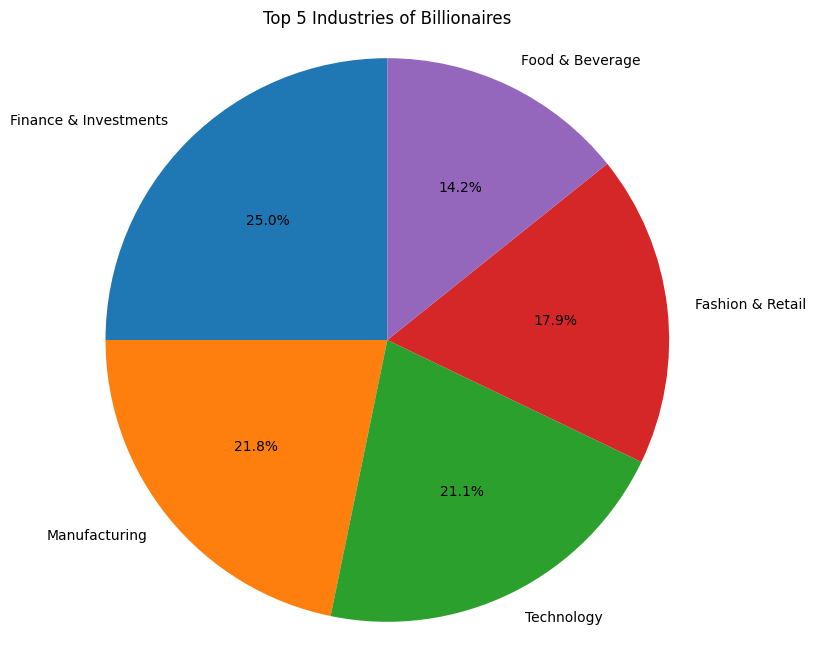

In [28]:
# prompt: Gráfico de torta de las 5 industrias más ricas

# Assuming 'df' is your DataFrame and 'industry' is the column containing industry information
top_5_industries = df['industries'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_industries, labels=top_5_industries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Industries of Billionaires')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

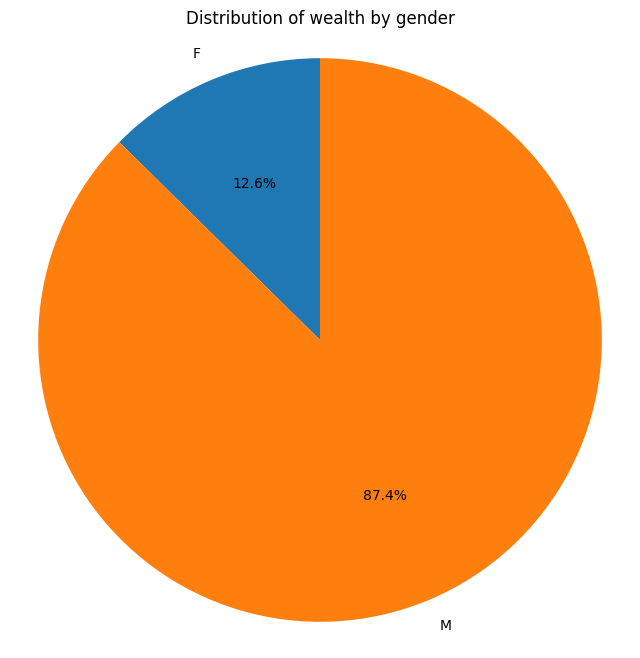

In [29]:
# prompt: Gráfico de torta de riqueza vs género

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'gender' and 'finalWorth'
gender_wealth = df.groupby('gender')['finalWorth'].sum()

plt.figure(figsize=(8, 8))
plt.pie(gender_wealth, labels=gender_wealth.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of wealth by gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

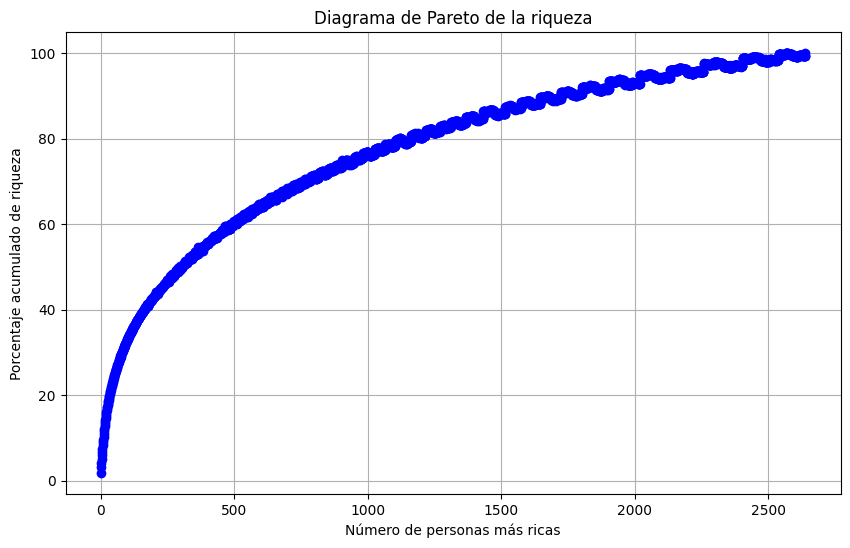

In [31]:
# prompt: Diagrama de Pareto de la riqueza

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'finalWorth' column
# Replace 'df' with your actual DataFrame variable name

# Calculate cumulative wealth percentage
df_sorted = df.sort_values('finalWorth', ascending=False)
df_sorted['cumulative_percentage'] = (df_sorted['finalWorth'].cumsum() / df_sorted['finalWorth'].sum()) * 100

# Create the Pareto chart
plt.figure(figsize=(10, 6))
plt.plot(df_sorted.index, df_sorted['cumulative_percentage'], marker='o', linestyle='-', color='b')
plt.xlabel('Número de personas más ricas')
plt.ylabel('Porcentaje acumulado de riqueza')
plt.title('Diagrama de Pareto de la riqueza')
plt.grid(True)
plt.show()